# Лабораторная работа 1

РАСПРЕДЕЛЕНИЕ ХИ-КВАДРАТ
Первые 10 значений выборки: [11.08995291  2.77034707  2.95699999  1.87994412 11.76680926  2.45649534
 10.2201283   0.6578882   8.60135622  1.8348877 ]


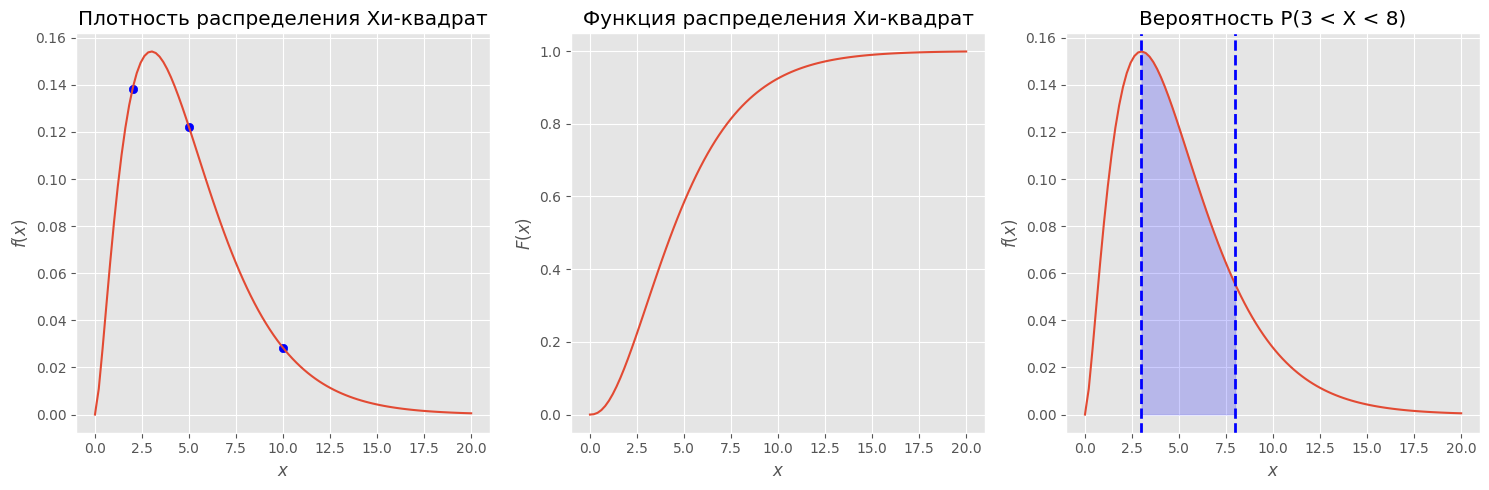

95%-квантиль распределения Хи-квадрат: 11.070


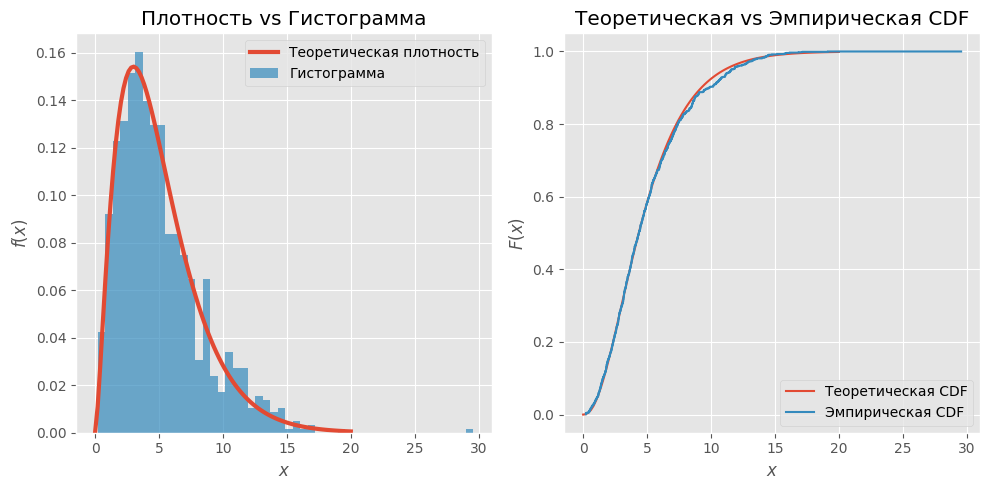

In [7]:
import numpy as np
import pandas as pd
from scipy import stats

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use('ggplot')  # стиль графиков

print("=" * 50)
print("РАСПРЕДЕЛЕНИЕ ХИ-КВАДРАТ")
print("=" * 50)

# 1. Хи-квадрат распределение (степени свободы = 5)
chi2_rv = stats.chi2(df=5)  # генератор распределения Хи-квадрат

sample_chi2 = chi2_rv.rvs(1000, random_state=1)  # сгенерируем 1000 значений
print("Первые 10 значений выборки:", sample_chi2[:10])

# Плотность распределения
x_chi2 = np.linspace(0, 20, 100)
pdf_chi2 = chi2_rv.pdf(x_chi2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_chi2, pdf_chi2)
plt.title('Плотность распределения Хи-квадрат')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Отметим несколько точек
points = [2, 5, 10]
plt.scatter(points, chi2_rv.pdf(points), color="blue")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_chi2 = chi2_rv.cdf(x_chi2)
plt.plot(x_chi2, cdf_chi2)
plt.title('Функция распределения Хи-квадрат')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_chi2, pdf_chi2)
plt.title('Вероятность P(3 < X < 8)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Закрасим область между 3 и 8
xq_chi2 = np.linspace(3, 8, 100)
yq_chi2 = chi2_rv.pdf(xq_chi2)
plt.fill_between(xq_chi2, 0, yq_chi2, color='blue', alpha=0.2)

plt.axvline(3, color='blue', linestyle="--", lw=2)
plt.axvline(8, color='blue', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
uroven_chi2 = 0.95
q_chi2 = chi2_rv.ppf(uroven_chi2)
print(f"95%-квантиль распределения Хи-квадрат: {q_chi2:.3f}")

# Сравнение теоретической плотности и гистограммы
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_chi2, pdf_chi2, lw=3, label='Теоретическая плотность')
plt.hist(sample_chi2, bins=50, density=True, alpha=0.7, label='Гистограмма')
plt.title('Плотность vs Гистограмма')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

# Сравнение теоретической и эмпирической функций распределения
plt.subplot(1, 2, 2)
plt.plot(x_chi2, cdf_chi2, label='Теоретическая CDF')
ecdf_chi2 = ECDF(sample_chi2)
plt.step(ecdf_chi2.x, ecdf_chi2.y, label='Эмпирическая CDF')
plt.title('Теоретическая vs Эмпирическая CDF')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show()


РАСПРЕДЕЛЕНИЕ СТЬЮДЕНТА
Первые 10 значений выборки: [ 1.95097872 -0.92471806 -0.71724277 -1.92030695  0.35025726 -0.61933354
 -0.36575983  0.69476192 -0.22202897  1.83845074]


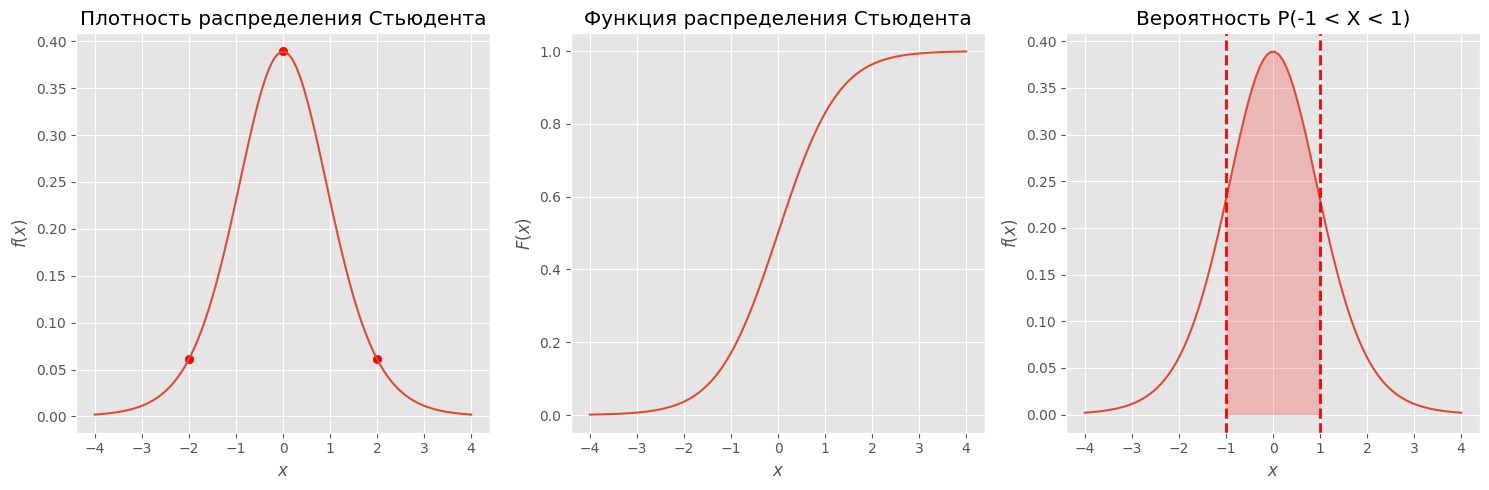

97.5%-квантиль распределения Стьюдента: 2.228


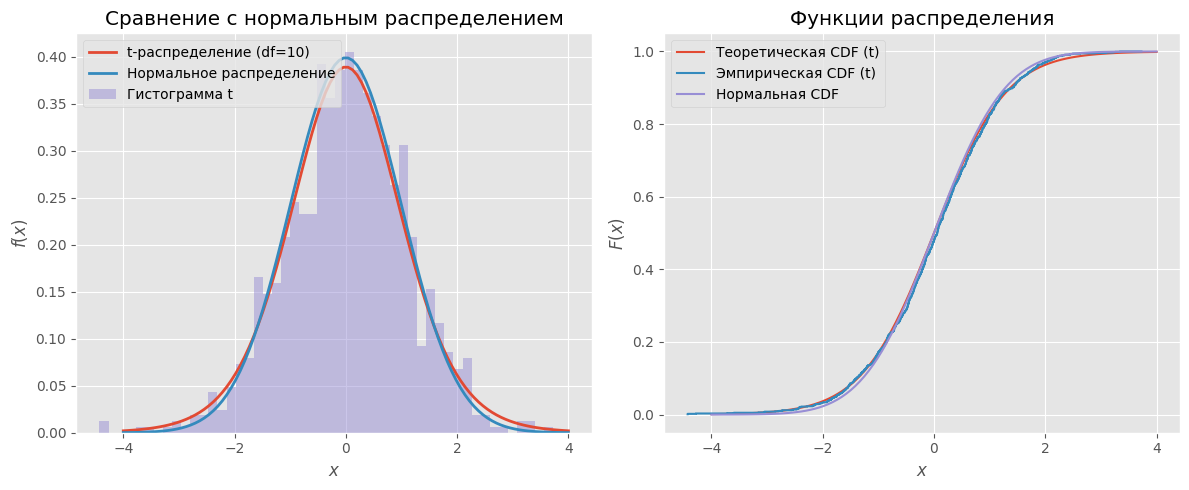

In [8]:
print("\n" + "=" * 50)
print("РАСПРЕДЕЛЕНИЕ СТЬЮДЕНТА")
print("=" * 50)

# 2. Распределение Стьюдента (степени свободы = 10)
t_rv = stats.t(df=10)  # генератор распределения Стьюдента

sample_t = t_rv.rvs(1000, random_state=1)
print("Первые 10 значений выборки:", sample_t[:10])

# Плотность распределения
x_t = np.linspace(-4, 4, 100)
pdf_t = t_rv.pdf(x_t)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_t, pdf_t)
plt.title('Плотность распределения Стьюдента')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

points_t = [-2, 0, 2]
plt.scatter(points_t, t_rv.pdf(points_t), color="red")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_t = t_rv.cdf(x_t)
plt.plot(x_t, cdf_t)
plt.title('Функция распределения Стьюдента')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_t, pdf_t)
plt.title('Вероятность P(-1 < X < 1)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq_t = np.linspace(-1, 1, 100)
yq_t = t_rv.pdf(xq_t)
plt.fill_between(xq_t, 0, yq_t, color='red', alpha=0.2)

plt.axvline(-1, color='red', linestyle="--", lw=2)
plt.axvline(1, color='red', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
q_t = t_rv.ppf(0.975)
print(f"97.5%-квантиль распределения Стьюдента: {q_t:.3f}")

# Сравнение с нормальным распределением
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
norm_rv = stats.norm(loc=0, scale=1)
plt.plot(x_t, pdf_t, lw=2, label='t-распределение (df=10)')
plt.plot(x_t, norm_rv.pdf(x_t), lw=2, label='Нормальное распределение')
plt.hist(sample_t, bins=50, density=True, alpha=0.5, label='Гистограмма t')
plt.title('Сравнение с нормальным распределением')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_t, cdf_t, label='Теоретическая CDF (t)')
ecdf_t = ECDF(sample_t)
plt.step(ecdf_t.x, ecdf_t.y, label='Эмпирическая CDF (t)')
plt.plot(x_t, norm_rv.cdf(x_t), label='Нормальная CDF')
plt.title('Функции распределения')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show()


РАСПРЕДЕЛЕНИЕ ФИШЕРА
Первые 10 значений выборки: [3.19969083 1.0905946  3.66812373 6.90048868 3.22019054 1.27514858
 0.241208   2.26443537 0.60784578 0.8501722 ]


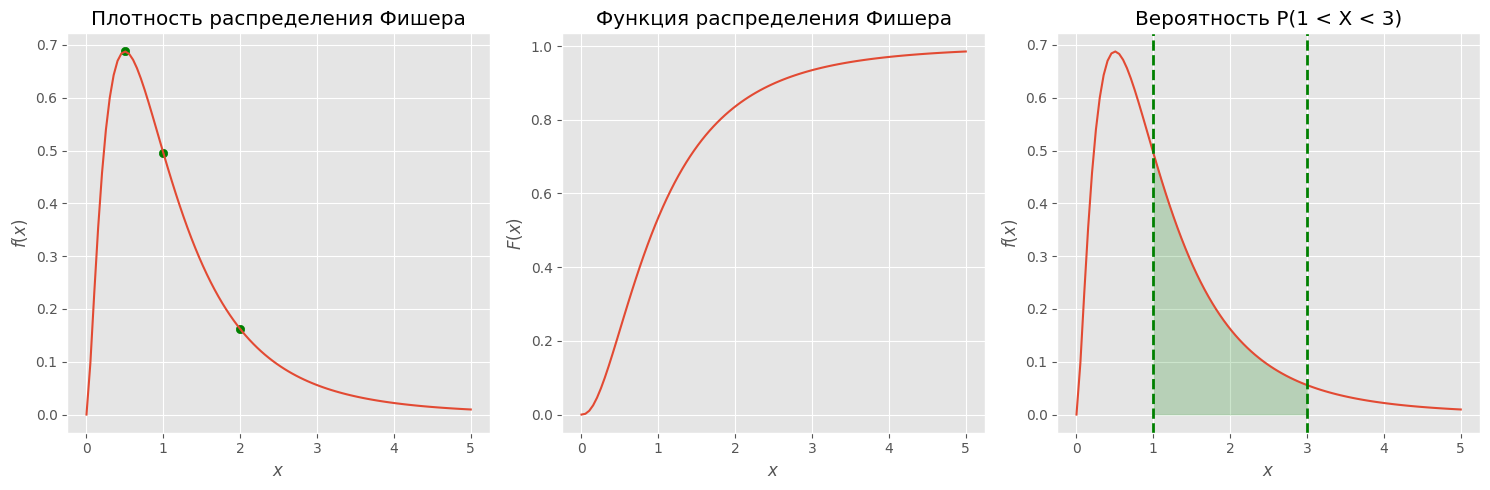

95%-квантиль распределения Фишера: 3.326


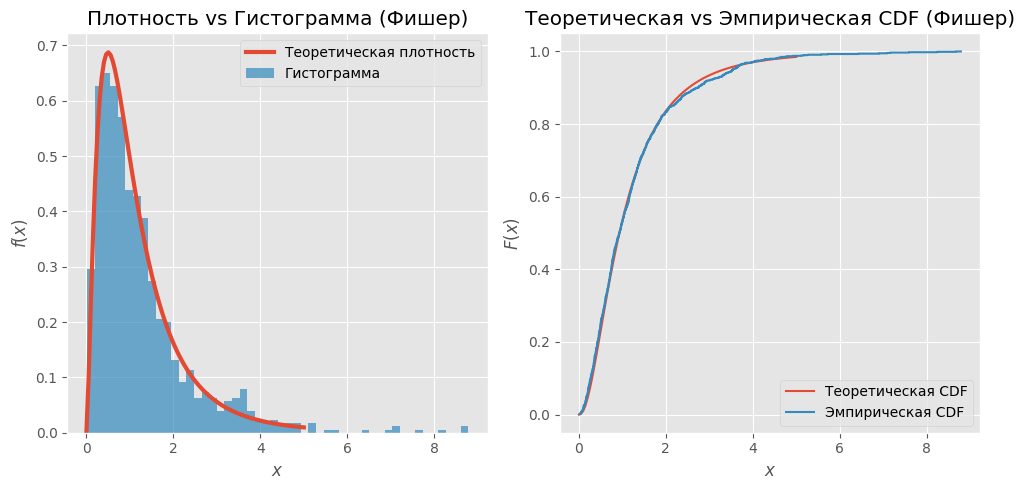

In [9]:
print("\n" + "=" * 50)
print("РАСПРЕДЕЛЕНИЕ ФИШЕРА")
print("=" * 50)

# 3. Распределение Фишера (степени свободы 5 и 10)
f_rv = stats.f(dfn=5, dfd=10)  # генератор распределения Фишера

sample_f = f_rv.rvs(1000, random_state=1)
print("Первые 10 значений выборки:", sample_f[:10])

# Плотность распределения
x_f = np.linspace(0, 5, 100)
pdf_f = f_rv.pdf(x_f)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_f, pdf_f)
plt.title('Плотность распределения Фишера')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

points_f = [0.5, 1, 2]
plt.scatter(points_f, f_rv.pdf(points_f), color="green")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_f = f_rv.cdf(x_f)
plt.plot(x_f, cdf_f)
plt.title('Функция распределения Фишера')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_f, pdf_f)
plt.title('Вероятность P(1 < X < 3)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq_f = np.linspace(1, 3, 100)
yq_f = f_rv.pdf(xq_f)
plt.fill_between(xq_f, 0, yq_f, color='green', alpha=0.2)

plt.axvline(1, color='green', linestyle="--", lw=2)
plt.axvline(3, color='green', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
q_f = f_rv.ppf(0.95)
print(f"95%-квантиль распределения Фишера: {q_f:.3f}")

# Сравнение теоретической плотности и гистограммы
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_f, pdf_f, lw=3, label='Теоретическая плотность')
plt.hist(sample_f, bins=50, density=True, alpha=0.7, label='Гистограмма')
plt.title('Плотность vs Гистограмма (Фишер)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_f, cdf_f, label='Теоретическая CDF')
ecdf_f = ECDF(sample_f)
plt.step(ecdf_f.x, ecdf_f.y, label='Эмпирическая CDF')
plt.title('Теоретическая vs Эмпирическая CDF (Фишер)')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show() 

ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ
Первые 10 значений выборки: [1.07921167e+00 2.54825051e+00 2.28762717e-04 7.20025510e-01
 3.17419190e-01 1.93767743e-01 4.12229268e-01 8.47952964e-01
 1.01090508e+00 1.54791955e+00]


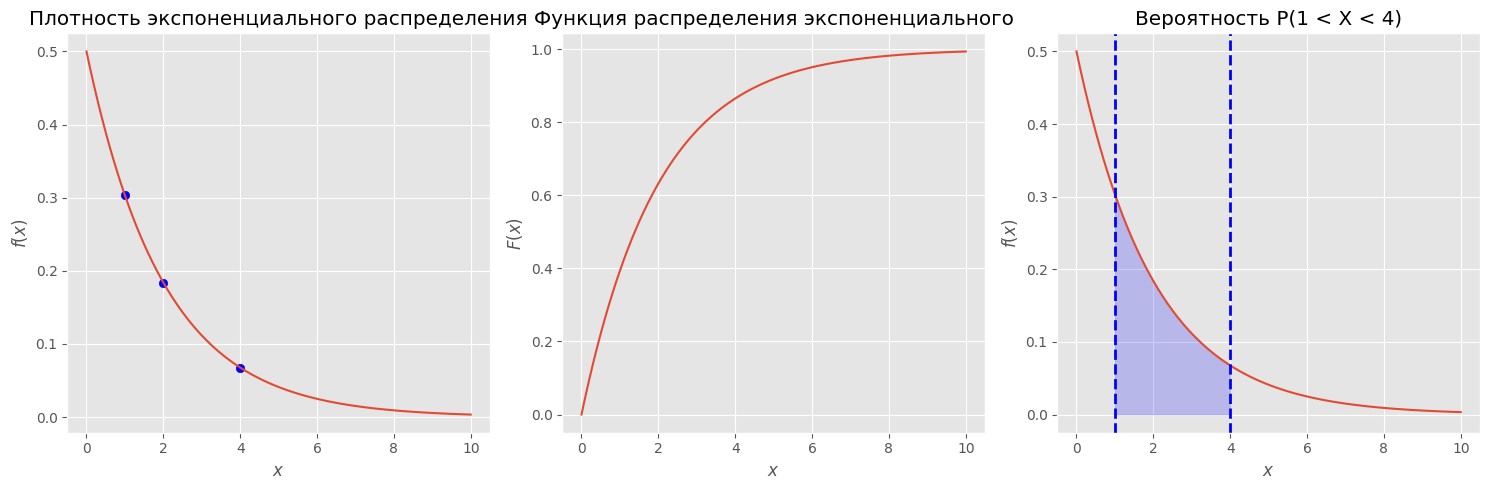

95%-квантиль экспоненциального распределения: 5.991


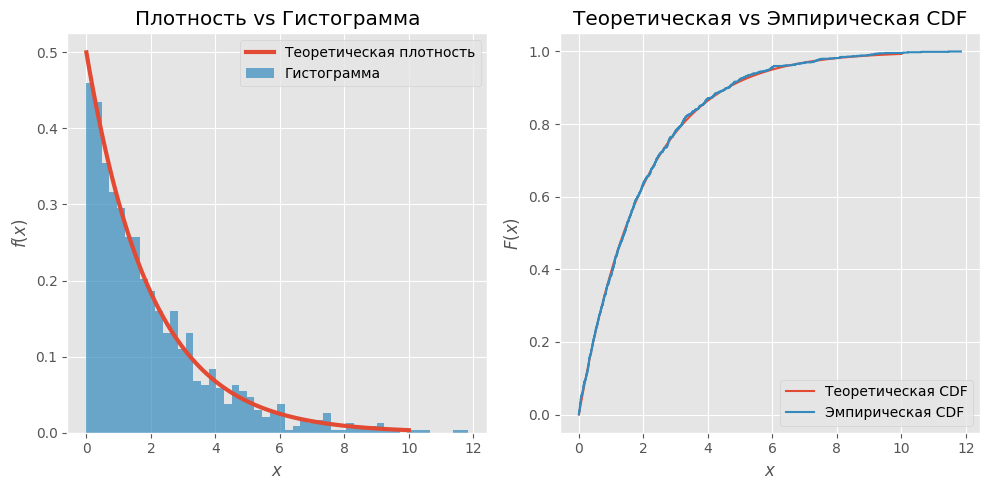

In [10]:
print("=" * 50)
print("ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ")
print("=" * 50)

# 1. Экспоненциальное распределение (λ = 0.5, scale = 2)
exp_rv = stats.expon(scale=2)  # генератор экспоненциального распределения

sample_exp = exp_rv.rvs(1000, random_state=1)  # сгенерируем 1000 значений
print("Первые 10 значений выборки:", sample_exp[:10])

# Плотность распределения
x_exp = np.linspace(0, 10, 100)
pdf_exp = exp_rv.pdf(x_exp)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_exp, pdf_exp)
plt.title('Плотность экспоненциального распределения')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Отметим несколько точек
points = [1, 2, 4]
plt.scatter(points, exp_rv.pdf(points), color="blue")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_exp = exp_rv.cdf(x_exp)
plt.plot(x_exp, cdf_exp)
plt.title('Функция распределения экспоненциального')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_exp, pdf_exp)
plt.title('Вероятность P(1 < X < 4)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Закрасим область между 1 и 4
xq_exp = np.linspace(1, 4, 100)
yq_exp = exp_rv.pdf(xq_exp)
plt.fill_between(xq_exp, 0, yq_exp, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(4, color='blue', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
uroven_exp = 0.95
q_exp = exp_rv.ppf(uroven_exp)
print(f"95%-квантиль экспоненциального распределения: {q_exp:.3f}")

# Сравнение теоретической плотности и гистограммы
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_exp, pdf_exp, lw=3, label='Теоретическая плотность')
plt.hist(sample_exp, bins=50, density=True, alpha=0.7, label='Гистограмма')
plt.title('Плотность vs Гистограмма')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

# Сравнение теоретической и эмпирической функций распределения
plt.subplot(1, 2, 2)
plt.plot(x_exp, cdf_exp, label='Теоретическая CDF')
ecdf_exp = ECDF(sample_exp)
plt.step(ecdf_exp.x, ecdf_exp.y, label='Эмпирическая CDF')
plt.title('Теоретическая vs Эмпирическая CDF')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show()